In [159]:
# Importing necessary libraries
import pandas as pd 
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt

In [160]:
# Loading data
filename = 'shop.csv'
data = read_csv(filename)
data.head()

,date,item
0,2016-04-29T18:38:08Z,inifinix
1,2016-04-29T16:08:27Z,inifinix
2,2016-04-29T16:19:04Z,inifinix
3,2016-04-29T17:29:31Z,iPhone
4,2016-04-29T16:07:23Z,nokia


In [161]:
data.head(10)

,date,item
0,2016-04-29T18:38:08Z,inifinix
1,2016-04-29T16:08:27Z,inifinix
2,2016-04-29T16:19:04Z,inifinix
3,2016-04-29T17:29:31Z,iPhone
4,2016-04-29T16:07:23Z,nokia
5,2016-04-27T08:36:51Z,nokia
6,2016-04-27T15:05:12Z,inifinix
7,2016-04-27T15:39:58Z,iPhone
8,2016-04-29T08:02:16Z,tecno
9,2016-04-27T12:48:25Z,tecno


In [162]:
data.tail()

,date,item
497,2016-03-17T10:13:38Z,samsung
498,2016-03-17T10:21:08Z,samsung
499,2016-03-17T11:09:11Z,samsung
500,2016-03-17T11:09:11Z,samsung
501,2016-03-17T10:13:38Z,samsung


In [163]:
data.tail(10)

,date,item
492,2016-04-28T10:24:19Z,samsung
493,2016-04-29T08:44:51Z,inifinix
494,2016-04-18T10:26:11Z,samsung
495,2016-04-27T08:03:55Z,samsung
496,2016-03-16T11:05:43Z,samsung
497,2016-03-17T10:13:38Z,samsung
498,2016-03-17T10:21:08Z,samsung
499,2016-03-17T11:09:11Z,samsung
500,2016-03-17T11:09:11Z,samsung
501,2016-03-17T10:13:38Z,samsung


### Data Exploration

In [164]:
data.dtypes

date    object
item    object
dtype: object

In [165]:
data.shape

(502, 2)

In [166]:
len(data)

502

In [167]:
data.mean()

Series([], dtype: float64)

In [168]:
data.corr()

""


In [169]:
# data.describe()

In [170]:
data.max()

date    2016-04-29T18:39:57Z
item                   tecno
dtype: object

In [171]:
data.skew()

Series([], dtype: float64)

### Data Visualization

In [172]:
phone = data.pivot_table(columns=['item'], aggfunc='size')
print(phone)

item
blackberry      4
iPhone        134
inifinix      126
itel           10
motorolla       8
nokia          15
samsung       141
tecno          64
dtype: int64


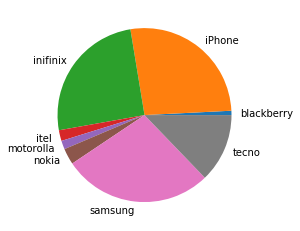

In [173]:
y = [4,134,126,10,8,15,139,64]
y = np.array(y)

items = ['blackberry','iPhone','inifinix','itel',
         'motorolla','nokia','samsung','tecno']

plt.pie(y, labels=items)
plt.show()


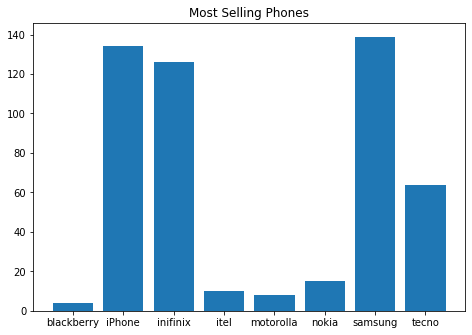

In [174]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(items,y)
ax.set_title("Most Selling Phones")
plt.show()

#### Data Cleaning

In [175]:
data.head()

,date,item
0,2016-04-29T18:38:08Z,inifinix
1,2016-04-29T16:08:27Z,inifinix
2,2016-04-29T16:19:04Z,inifinix
3,2016-04-29T17:29:31Z,iPhone
4,2016-04-29T16:07:23Z,nokia


In [176]:
# Handling Missing Values
data.isnull().sum()

date    0
item    0
dtype: int64

In [177]:
data.dropna(how='any', inplace=True)

In [178]:
data.isnull().sum()

date    0
item    0
dtype: int64

In [179]:
# Handling Duplicates Value
data.duplicated().sum()

12

In [180]:
data.drop_duplicates(keep='first', inplace=True)

In [181]:
data.duplicated().sum()

0

In [182]:
data.dtypes

date    object
item    object
dtype: object

In [183]:
# Data conversion
data.head()

,date,item
0,2016-04-29T18:38:08Z,inifinix
1,2016-04-29T16:08:27Z,inifinix
2,2016-04-29T16:19:04Z,inifinix
3,2016-04-29T17:29:31Z,iPhone
4,2016-04-29T16:07:23Z,nokia


In [184]:
data.dtypes

date    object
item    object
dtype: object

In [185]:
data['date'] = pd.to_datetime(data['date'],
                             format ='%Y-%m-%dT%H:%M:%SZ',
                             errors='coerce')

In [186]:
data.head()

,date,item
0,2016-04-29 18:38:08,inifinix
1,2016-04-29 16:08:27,inifinix
2,2016-04-29 16:19:04,inifinix
3,2016-04-29 17:29:31,iPhone
4,2016-04-29 16:07:23,nokia


In [187]:
data.dtypes

date    datetime64[ns]
item            object
dtype: object

In [188]:
# Data preprocessing
data['sale_year'] = data['date'].dt.year
data['sale_month'] = data['date'].dt.month
data['sale_week'] = data['date'].dt.week
data['sale_day'] = data['date'].dt.day
data['sale_hour'] = data['date'].dt.hour
data['sale_dayofweek'] = data['date'].dt.dayofweek

In [189]:
data.head()

,date,item,sale_year,sale_month,sale_week,sale_day,sale_hour,sale_dayofweek
0,2016-04-29 18:38:08,inifinix,2016,4,17,29,18,4
1,2016-04-29 16:08:27,inifinix,2016,4,17,29,16,4
2,2016-04-29 16:19:04,inifinix,2016,4,17,29,16,4
3,2016-04-29 17:29:31,iPhone,2016,4,17,29,17,4
4,2016-04-29 16:07:23,nokia,2016,4,17,29,16,4


In [190]:
# Feature selection
df_x = data[['sale_day', 'sale_dayofweek', 'sale_month']]
df_y = data[['item']]

In [191]:
df_x.head()

,sale_day,sale_dayofweek,sale_month
0,29,4,4
1,29,4,4
2,29,4,4
3,29,4,4
4,29,4,4


In [192]:
df_y.head()

,item
0,inifinix
1,inifinix
2,inifinix
3,iPhone
4,nokia


In [193]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=0)

In [194]:
# Fitting Model
#from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(df_x, df_y)

C:\Users\MoTech\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MoTech\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MoTech\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [195]:
logreg.score(X_test, y_test)

0.35374149659863946

In [196]:
X_test.shape

(147, 3)

In [197]:
# Making Prediction
prediction = logreg.predict(X_test)
print(prediction[0:147])

['samsung' 'iPhone' 'iPhone' 'samsung' 'samsung' 'inifinix' 'samsung'
 'samsung' 'samsung' 'iPhone' 'samsung' 'iPhone' 'iPhone' 'iPhone'
 'samsung' 'samsung' 'samsung' 'samsung' 'samsung' 'iPhone' 'samsung'
 'iPhone' 'iPhone' 'samsung' 'inifinix' 'samsung' 'samsung' 'iPhone'
 'samsung' 'samsung' 'samsung' 'samsung' 'inifinix' 'iPhone' 'iPhone'
 'samsung' 'iPhone' 'inifinix' 'samsung' 'samsung' 'inifinix' 'samsung'
 'iPhone' 'samsung' 'inifinix' 'iPhone' 'iPhone' 'samsung' 'iPhone'
 'iPhone' 'samsung' 'iPhone' 'iPhone' 'iPhone' 'samsung' 'samsung'
 'samsung' 'samsung' 'samsung' 'inifinix' 'iPhone' 'inifinix' 'samsung'
 'samsung' 'samsung' 'iPhone' 'iPhone' 'samsung' 'samsung' 'inifinix'
 'iPhone' 'iPhone' 'samsung' 'samsung' 'iPhone' 'samsung' 'samsung'
 'samsung' 'samsung' 'samsung' 'samsung' 'inifinix' 'samsung' 'inifinix'
 'samsung' 'samsung' 'samsung' 'samsung' 'iPhone' 'samsung' 'samsung'
 'samsung' 'inifinix' 'samsung' 'iPhone' 'samsung' 'samsung' 'samsung'
 'samsung' 'samsung' 's

In [198]:
filename = 'april.csv'
df = read_csv(filename)
df.head()

,sele_day,sale_dayofweek,sale_month
0,1,4,4
1,2,5,4
2,3,6,4
3,4,0,4
4,5,1,4


In [199]:
df = df[['sele_day', 'sale_dayofweek', 'sale_month']]

In [200]:
prediction = logreg.predict(df)
print(prediction[0:29])

['iPhone' 'iPhone' 'iPhone' 'iPhone' 'iPhone' 'iPhone' 'iPhone' 'iPhone'
 'iPhone' 'iPhone' 'inifinix' 'iPhone' 'iPhone' 'iPhone' 'iPhone' 'iPhone'
 'iPhone' 'inifinix' 'inifinix' 'inifinix' 'inifinix' 'inifinix' 'samsung'
 'samsung' 'samsung' 'samsung' 'samsung' 'samsung' 'samsung']


In [201]:
test = [9,5,4]
test = np.array(test)
print(test.shape)
test = np.array(test).reshape(1,-1)
print(test.shape)

(3,)
(1, 3)


In [202]:
prediction = logreg.predict(test)
print(prediction[0])

iPhone


In [203]:
# Dumping the model
import joblib as joblib
joblib.dump(logreg, 'rogreg.pkl')

['rogreg.pkl']

In [204]:
# Loading the model
model = joblib.load('rogreg.pkl')

In [205]:
# Making prediction
result = model.predict(test)
print(result[0])

iPhone


In [206]:
# Performance Metric of Model

# Cross Validation
from sklearn.model_selection import cross_val_score
v = cross_val_score(logreg, X_train, y_train, cv=10)
for i in range(10):
    print("Accuracy is {0:2f}".format(v[i,]))
    
print("Accuracy Mean is ", v.mean())    
    

Accuracy is 0.368421
Accuracy is 0.378378
Accuracy is 0.324324
Accuracy is 0.351351
Accuracy is 0.194444
Accuracy is 0.250000
Accuracy is 0.250000
Accuracy is 0.312500
Accuracy is 0.290323
Accuracy is 0.322581
Accuracy Mean is  0.3042322776936529


C:\Users\MoTech\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\MoTech\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\MoTech\AppData\Local\Continuum\anaconda

In [207]:
# Using Confusion Marix
from sklearn.metrics import confusion_matrix
fit = logreg.fit(X_train, y_train)

C:\Users\MoTech\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MoTech\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MoTech\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [208]:
predict = fit.predict(X_test)
cmatrix = confusion_matrix(y_test, predict)
print(cmatrix)

[[ 0  0  0  0  0  0  3  0]
 [ 0 14  4  0  0  0 18  0]
 [ 0 17  1  0  0  0 20  0]
 [ 0  1  0  0  0  0  3  0]
 [ 0  1  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  5  0]
 [ 0 10  0  0  0  0 28  0]
 [ 0  7  0  0  0  0 13  0]]
